In [1]:
import pandas as pd
import sqlite3
query = 'SELECT * FROM white_wine'
conn = sqlite3.connect('wine_database.db')
cursor = conn.cursor()
df = pd.read_sql_query(query, conn)
df['Name'] = df['Name'].str.encode('iso-8859-1').str.decode('utf-8')
df['Region'] = df['Region'].str.encode('iso-8859-1').str.decode('utf-8')
df['Winery'] = df['Winery'].str.encode('iso-8859-1').str.decode('utf-8')
df

,Name,Country,Region,Winery,Rating,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,8.60,2018
...,...,...,...,...,...,...,...
3754,Private Bin Sauvignon Blanc 2019,New Zealand,Marlborough,Villa Maria,4.1,10.60,2019
3755,Blanco (Verdejo) 2018,Spain,Rueda,Marqués de Riscal,3.7,6.30,2018
3756,Sauvignon Blanc 2019,New Zealand,Marlborough,Oyster Bay,4.0,10.66,2019
3757,Sauvignon Blanc 2018,New Zealand,Marlborough,Kim Crawford,3.9,14.90,2018


In [ ]:
df.to_csv('scraped_White_Price.csv', index=False)

In [2]:
Counrty_dummies = pd.get_dummies(df["Country"])
Region_dummies = pd.get_dummies(df["Region"])
Winery_dummies = pd.get_dummies(df["Winery"])
empty_df = df.drop(columns=["Name", "Country", "Region", "Winery"])

In [3]:
df_scaled = pd.concat([empty_df, Region_dummies, Counrty_dummies, Winery_dummies], axis =1)
df_scaled.head()

,Rating,Price,Year,Abona,Abruzzo,Achaia,Aconcagua Costa,Aconcagua Valley,Adelaide Hills,Ahr,...,Ziereisen,Zonin,Zonnebloem,Zýmē,d'Arenberg,de Ladoucette,di Lenardo,Álvarez y Díez,Ökonomierat Rebholz,Κτημα Τσελεπου (Ktima Tselepos)
0,3.8,5.65,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.3,44.90,2010,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.2,33.25,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.9,8.99,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.9,8.60,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [5]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop(columns="Price")
y = df_scaled["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
model.fit(X, y)

LinearRegression()

In [7]:
LinearRegression()

LinearRegression()

In [8]:
predicted_y_values = model.predict(X)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.797395062527033.
The r2 is 0.797395062527033.
The mean squared error is 193.94443001405872.
The root mean squared error is 13.926393288072067.
The standard deviation is 30.93952509678372.


In [11]:
Region_prices = df.groupby("Region")["Price"].mean()
Region_prices

Region
Abona               11.990000
Abruzzo             16.553333
Achaia               9.900000
Aconcagua Costa     58.482500
Aconcagua Valley    14.800000
                      ...    
Zeltingen           26.320000
Zürich              20.200000
d Minis              8.200000
delle Venezie        8.020455
Štajerska           19.400000
Name: Price, Length: 456, dtype: float64

In [12]:
Year_prices = df.groupby("Year")["Price"].mean()
Year_prices


Year
1993    249.950000
1998     25.000000
1999    136.950000
2003     93.830000
2004    119.475000
2005     80.450000
2006     60.070000
2007     39.026667
2008    113.416667
2009    147.115000
2010     31.130000
2011     36.756250
2012     64.738077
2013     51.540714
2014     40.901059
2015     37.803840
2016     28.831116
2017     22.223355
2018     13.957194
2019      9.824796
2020      7.425000
Name: Price, dtype: float64

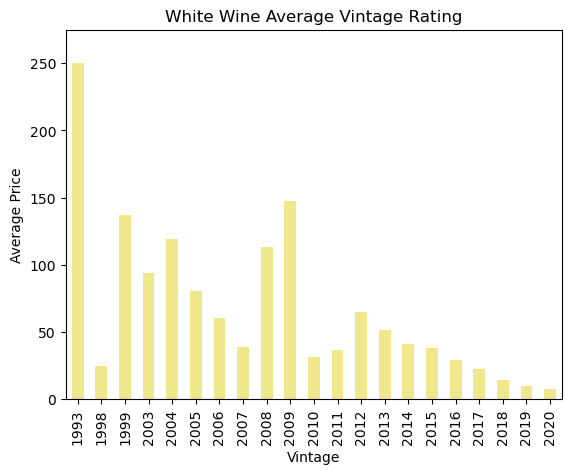

In [19]:
import matplotlib.pyplot as plt
plot_pandas = Year_prices.plot.bar(color='khaki')
plt.title("White Wine Average Vintage Rating")
plt.xlabel('Vintage')
plt.ylabel('Average Price')
plt.ylim(0, 275)
plt.show()

In [20]:
Country_prices = df.groupby("Country")["Price"].mean()
Country_prices

Country
Argentina         15.780893
Australia         22.542687
Austria           19.956872
Brazil            10.815000
Canada            14.900000
Chile             11.901818
China             23.415000
Croatia           22.250000
Czech Republic    25.400000
France            33.945758
Georgia           18.417500
Germany           22.327432
Greece            15.606250
Hungary           12.225000
Israel            12.265000
Italy             15.919899
Lebanon           32.070000
Luxembourg        16.890000
Moldova           10.980000
New Zealand       15.650851
Portugal          12.646207
Romania            9.858333
Slovakia          19.900000
Slovenia          13.953333
South Africa      13.522264
Spain             13.712617
Switzerland       23.543636
Turkey            12.000000
United States     22.430370
Uruguay           14.890000
Name: Price, dtype: float64

In [21]:
conn.close()